# RQ1 Analysis
RQ1. How do the frequency and total cost of water main breaks change across Ann Arbor neighborhoods over several seasons?

### Preparing the Data

In [19]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
# Import Watermain_Breaks_Reporting.csv from Google Drive
url_watermain_breaks = 'https://drive.google.com/file/d/1LTYIn0aq4gBmD65B508miLt8cSzfLom8/view?usp=sharing'
url_download_watermain_breaks ='https://drive.google.com/uc?export=download&id=' + url_watermain_breaks.split('/')[-2]
watermain_breaks_data = pd.read_csv(url_download_watermain_breaks)
watermain_breaks_data

,Work Order ID,Priority,Status,Submit To,Actual Start,Actual Finish,Address,Location,Initiated By,Date Initiated,...,SR Description,SR Initiated BY,SR Date Initiated,SR Submit To,SR Date Submit,SR Closed By,SR Date Closed,SR Priority,SR Status,SR Address
0,332757,1.0,CLOSED,NaN,12/28/2012 0:00,12/28/2012 0:00,326 E SUMMIT ST,23' W OF BEAKS WPL BEHIND WALK 8' N OF S CURB ...,user21,1/2/2013 8:49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,332990,1.0,CLOSED,NaN,12/28/2012 0:00,12/28/2012 0:00,1137 E ANN ST,100' E OF GLEN AVE\n74' E OF VALVE #01-00043,user21,1/3/2013 9:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,333296,1.0,CLOSED,user19,1/5/2013 0:00,1/5/2013 0:00,3014 LEXINGTON DR,28' N OF SPL OF 3014 LEXINGTON DR,user21,1/7/2013 10:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,333304,1.0,CLOSED,NaN,1/6/2013 0:00,1/6/2013 0:00,1815 FERDON RD,3' FT N OF SANITARY MANHOLE AT FERDON RD AND F...,user21,1/7/2013 11:06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,333352,1.0,CLOSED,user19,1/8/2013 0:00,1/8/2013 0:00,2200 GLENDALOCH RD,52' E OF WPL,user21,1/8/2013 8:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,865226,1.0,CLOSED,user23,NaN,8/1/2023 11:00,3035 PROVINCIAL,3035 PROVINCIAL,user23,8/1/2023 12:12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,865429,1.0,CLOSED,user69,NaN,8/4/2023 12:47,NaN,E William,user23,8/2/2023 13:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963,865678,1.0,CLOSED,user69,NaN,8/4/2023 12:44,NaN,1117 BROOKS,user23,8/4/2023 10:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,865683,1.0,CLOSED,user69,8/7/2023 6:30,8/7/2023 12:30,1910 HILL ST,2023080400454 CLEARS @11:30 8-4-23,user23,8/4/2023 10:19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Import Watermain_Attributes.csv from Google Drive
url_watermain_attributes = 'https://docs.google.com/spreadsheets/d/11MWo0d_6BOt7xw7jRkW4yVzdyfhDJoU-dfq7nHfpLzI/edit?usp=sharing' #changed to updated link
url_download_watermain_attributes ='https://drive.google.com/uc?export=download&id=' + url_watermain_attributes.split('/')[-2]
watermain_attributes_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1pIrZNiLOfzLmbNErw2JdtS0X0exFCEPLYovPrTzEauk/gviz/tq?tqx=out:csv')
watermain_attributes_data

,ENABLED,FACILITYID,LOCATION,INSTALLDAT,SUBTYPE,INSTALLCON,ASBUILTNUM,DATAORIGIN,OWNER,COMMENTS,...,WOYCOORDINATE.1,NIEGHBORHOOD NUMBER.1,NEIGHBORHOOD.1,LANDUSE CODE.1,LANDUSE.1,LANDUSE GROUP.1,CreekName.1,ZONING CLASS.1,MINORCIVIL,SYMBOL.1
0,1,22-23992,Arborland Mall,9/11/1961 0:00,1,NaN,A138W-W,ASBUILT,AA,Cast Iron Confirmed,...,5199502.512,14,BADER-ANN ARBOR HILLS,310.0,General Retail,Commercial,Swift Run,C3,5,005C3
1,1,00-00079,Marlborough,6/30/1962 0:00,2,AA,A171W-W,ASBUILT,AA,NaN,...,5198827.239,42,GEORGETOWN-PINE VALLEY,110.0,Single Family,Residential,Mallets Creek,R1D,5,005R1D
2,1,00-00404,Platt Rd,7/24/1978 0:00,2,AA,A545W-W5,ASBUILT,AA,NaN,...,5197191.130,47,BROWN PARK,110.0,Single Family,Residential,Swift Run,R1C,5,005R1C
3,1,00-00428,Platt Rd,7/24/1978 0:00,2,AA,A545W-W6,ASBUILT,AA,NaN,...,5197367.590,47,BROWN PARK,110.0,Single Family,Residential,Swift Run,R1C,5,005R1C
4,1,00-00429,Platt Rd,1/1/1960 0:00,1,NaN,NaN,NaN,AA,NaN,...,5197349.000,47,BROWN PARK,110.0,Single Family,Residential,Swift Run,R1C,5,005R1C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,00-072287,Ashley St,12/8/2009 0:00,1,BE,2007053-W1,ASBUILT,AA,NaN,...,5202514.209,22,SOUTH CENTRAL,130.0,Multiple Family,Residential,Allen Creek,D2,5,005D2
872,1,00-073475,Briarcliff St,3/31/1962 0:00,1,NaN,A142W-W,ASBUILT,AA,NaN,...,5206922.329,2,ORCHARD HILLS-MAPLEWOOD,110.0,Single Family,Residential,Millers Creek,R1C,5,005R1C
873,1,00-073478,Pomona Rd,1/1/1960 0:00,1,NaN,NaN,NaN,AA,NaN,...,5205117.620,26,MACK SCHOOL-SUNSET,110.0,Single Family,Residential,Allen Creek,R1B,5,005R1B
874,1,00-04801,Depot St,1/1/1886 0:00:00,1,NaN,NaN,NaN,AA,NaN,...,5204195.057,20,NORTH CENTRAL,920.0,Non-Residential Mixed,Mixed Use,Huron River,C1B,5,005C1B


In [22]:
# Merge the Watermain_Attributes.csv data with Watermain_Breaks_Reporting.csv by utilizing the unique identifier “Work Order ID”.
merged_data = pd.merge(watermain_breaks_data, watermain_attributes_data, how='left', left_on=['Work Order ID'], right_on=['WORKORDERI'])

# I used left_on and right_on to merge the two separate ID columns from the different datasets!

In [23]:
# Create a copy of the dataframe with blanks - will use in robustness check later
blank_data_included = merged_data

# Fill the blank data in (again, we will justify this later on)
merged_data = merged_data.fillna(0)
merged_data

,Work Order ID,Priority,Status,Submit To,Actual Start,Actual Finish,Address,Location,Initiated By,Date Initiated,...,WOYCOORDINATE.1,NIEGHBORHOOD NUMBER.1,NEIGHBORHOOD.1,LANDUSE CODE.1,LANDUSE.1,LANDUSE GROUP.1,CreekName.1,ZONING CLASS.1,MINORCIVIL,SYMBOL.1
0,332757,1.0,CLOSED,0,12/28/2012 0:00,12/28/2012 0:00,326 E SUMMIT ST,23' W OF BEAKS WPL BEHIND WALK 8' N OF S CURB ...,user21,1/2/2013 8:49,...,5204085.152,20.0,NORTH CENTRAL,120.0,Two Family,Residential,Huron River,R4C,5.0,005R4C
1,332990,1.0,CLOSED,0,12/28/2012 0:00,12/28/2012 0:00,1137 E ANN ST,100' E OF GLEN AVE\n74' E OF VALVE #01-00043,user21,1/3/2013 9:34,...,5203359.117,18.0,CENTRAL CAMPUS MEDICAL,570.0,Parking,Transportation/Communication/Utilities,Huron River,R4C,5.0,005R4C
2,333296,1.0,CLOSED,user19,1/5/2013 0:00,1/5/2013 0:00,3014 LEXINGTON DR,28' N OF SPL OF 3014 LEXINGTON DR,user21,1/7/2013 10:34,...,5208237.657,1.0,NORTHBURY-CHAPEL HILL,110.0,Single Family,Residential,Traver Creek,R1C,5.0,005R1C
3,333304,1.0,CLOSED,0,1/6/2013 0:00,1/6/2013 0:00,1815 FERDON RD,3' FT N OF SANITARY MANHOLE AT FERDON RD AND F...,user21,1/7/2013 11:06,...,5199943.774,43.0,PATTENGILL-ST FRANCIS,110.0,Single Family,Residential,Mallets Creek,R1D,5.0,005R1D
4,333352,1.0,CLOSED,user19,1/8/2013 0:00,1/8/2013 0:00,2200 GLENDALOCH RD,52' E OF WPL,user21,1/8/2013 8:26,...,5201009.373,14.0,BADER-ANN ARBOR HILLS,110.0,Single Family,Residential,Huron River,R1A,5.0,005R1A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,865678,1.0,CLOSED,user69,0,8/4/2023 12:44,0,1117 BROOKS,user23,8/4/2023 10:00,...,5204864.100,26.0,MACK SCHOOL-SUNSET,110.0,Single Family,Residential,Allen Creek,R1C,5.0,005R1C
1154,865678,1.0,CLOSED,user69,0,8/4/2023 12:44,0,1117 BROOKS,user23,8/4/2023 10:00,...,5204864.100,26.0,MACK SCHOOL-SUNSET,110.0,Single Family,Residential,Allen Creek,R1C,5.0,005R1C
1155,865683,1.0,CLOSED,user69,8/7/2023 6:30,8/7/2023 12:30,1910 HILL ST,2023080400454 CLEARS @11:30 8-4-23,user23,8/4/2023 10:19,...,5202056.010,14.0,BADER-ANN ARBOR HILLS,140.0,Group Housing,Residential,Mallets Creek,R1C,5.0,005R1C
1156,865968,1.0,IP,user104,8/7/2023 14:30,8/7/2023 22:00,0,Glen Ave,user23,8/7/2023 14:04,...,5203509.441,18.0,CENTRAL CAMPUS MEDICAL,650.0,Hospital,Public/Quasi-Public/Institutional/Organi,Huron River,PL,5.0,005PL


In [24]:
# Create Seasons, Years, Months, and Ages Columns using "Date Initiated"
# This will allow us to aggregate in different ways and complete robustness checks

# Initialize the lists
seasons = []
years = []
months = []
age = []

# Convert to datetime so that we can extract the month and year
merged_data["Date Initiated"] = pd.to_datetime(merged_data["Date Initiated"])

# Manipulate the INSTALLDAT column to obtain the age of every water main
for item in merged_data["INSTALLDAT"]:
    diff = datetime.now() - pd.to_datetime(item)
    idx = str(diff).index(" days")
    temp = str(diff)[:idx]
    age.append(float(temp)/365)

# Iterate through every date
for date in merged_data["Date Initiated"]:
    years.append(date.year)
    months.append(date.month)
    
    # Categorize each break by its season -> this is how I arbitrarily broke it down
    if date.month in [12, 1, 2]:
        seasons.append("Winter")
    elif date.month in [3, 4, 5]:
        seasons.append("Spring")
    elif date.month in [6, 7, 8]:
        seasons.append("Summer")
    else:
        seasons.append("Fall")
        
# Use the created lists to populate merged_data
merged_data["Season"] = seasons
merged_data["Year"] = years
merged_data["Month"] = months
merged_data["Age"] = age

merged_data

,Work Order ID,Priority,Status,Submit To,Actual Start,Actual Finish,Address,Location,Initiated By,Date Initiated,...,LANDUSE.1,LANDUSE GROUP.1,CreekName.1,ZONING CLASS.1,MINORCIVIL,SYMBOL.1,Season,Year,Month,Age
0,332757,1.0,CLOSED,0,12/28/2012 0:00,12/28/2012 0:00,326 E SUMMIT ST,23' W OF BEAKS WPL BEHIND WALK 8' N OF S CURB ...,user21,2013-01-02 08:49:00,...,Two Family,Residential,Huron River,R4C,5.0,005R4C,Winter,2013,1,17.684932
1,332990,1.0,CLOSED,0,12/28/2012 0:00,12/28/2012 0:00,1137 E ANN ST,100' E OF GLEN AVE\n74' E OF VALVE #01-00043,user21,2013-01-03 09:34:00,...,Parking,Transportation/Communication/Utilities,Huron River,R4C,5.0,005R4C,Winter,2013,1,124.030137
2,333296,1.0,CLOSED,user19,1/5/2013 0:00,1/5/2013 0:00,3014 LEXINGTON DR,28' N OF SPL OF 3014 LEXINGTON DR,user21,2013-01-07 10:34:00,...,Single Family,Residential,Traver Creek,R1C,5.0,005R1C,Winter,2013,1,58.767123
3,333304,1.0,CLOSED,0,1/6/2013 0:00,1/6/2013 0:00,1815 FERDON RD,3' FT N OF SANITARY MANHOLE AT FERDON RD AND F...,user21,2013-01-07 11:06:00,...,Single Family,Residential,Mallets Creek,R1D,5.0,005R1D,Winter,2013,1,94.010959
4,333352,1.0,CLOSED,user19,1/8/2013 0:00,1/8/2013 0:00,2200 GLENDALOCH RD,52' E OF WPL,user21,2013-01-08 08:26:00,...,Single Family,Residential,Huron River,R1A,5.0,005R1A,Winter,2013,1,73.997260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,865678,1.0,CLOSED,user69,0,8/4/2023 12:44,0,1117 BROOKS,user23,2023-08-04 10:00:00,...,Single Family,Residential,Allen Creek,R1C,5.0,005R1C,Summer,2023,8,73.997260
1154,865678,1.0,CLOSED,user69,0,8/4/2023 12:44,0,1117 BROOKS,user23,2023-08-04 10:00:00,...,Single Family,Residential,Allen Creek,R1C,5.0,005R1C,Summer,2023,8,73.997260
1155,865683,1.0,CLOSED,user69,8/7/2023 6:30,8/7/2023 12:30,1910 HILL ST,2023080400454 CLEARS @11:30 8-4-23,user23,2023-08-04 10:19:00,...,Group Housing,Residential,Mallets Creek,R1C,5.0,005R1C,Summer,2023,8,114.024658
1156,865968,1.0,IP,user104,8/7/2023 14:30,8/7/2023 22:00,0,Glen Ave,user23,2023-08-07 14:04:00,...,Hospital,Public/Quasi-Public/Institutional/Organi,Huron River,PL,5.0,005PL,Summer,2023,8,118.027397


### Analyzing the Data

In [25]:
# Create a new dataframe to store the fields
data_by_season = pd.DataFrame()
data_by_season["Work Order ID"] = merged_data["Work Order ID"]
data_by_season["Month"] = merged_data["Month"]
data_by_season["Year"] = merged_data["Year"]
data_by_season["Season"] = merged_data["Season"]
data_by_season["Neighborhood"] = merged_data["NEIGHBORHOOD.1"]
data_by_season["Material"] = merged_data["MATERIAL"]
data_by_season["Land Use"] = merged_data["LANDUSE.1"]
data_by_season["TotalCost"] = merged_data["Total Cost"]
data_by_season["Age"] = merged_data["Age"]


# Some work order IDs have multiple rows (multiple breakages), so we'll remove duplicates here
data_by_season = data_by_season.drop_duplicates()

data_by_season

,Work Order ID,Month,Year,Season,Neighborhood,Material,Land Use,TotalCost,Age
0,332757,1,2013,Winter,NORTH CENTRAL,DI,Two Family,3217.0200,17.684932
1,332990,1,2013,Winter,CENTRAL CAMPUS MEDICAL,CI,Parking,2708.4800,124.030137
2,333296,1,2013,Winter,NORTHBURY-CHAPEL HILL,DI,Single Family,2541.4600,58.767123
3,333304,1,2013,Winter,PATTENGILL-ST FRANCIS,CI,Single Family,2736.4800,94.010959
4,333352,1,2013,Winter,BADER-ANN ARBOR HILLS,CI,Single Family,1245.0900,73.997260
...,...,...,...,...,...,...,...,...,...
1150,865226,8,2023,Summer,BADER-ANN ARBOR HILLS,CI,Single Family,283.2000,62.498630
1151,865429,8,2023,Summer,SOUTH CENTRAL,DI,Auto Sales/Service,16416.8265,40.271233
1152,865678,8,2023,Summer,MACK SCHOOL-SUNSET,CI,Single Family,823.4300,73.997260
1155,865683,8,2023,Summer,BADER-ANN ARBOR HILLS,CI,Group Housing,4312.5030,114.024658


In [27]:
# Since most of our data is viable, we'll make the decision to exclude what is NA
data_by_season = data_by_season[data_by_season['Neighborhood'] !=0]
data_by_season

,Work Order ID,Month,Year,Season,Neighborhood,Material,Land Use,TotalCost,Age
0,332757,1,2013,Winter,NORTH CENTRAL,DI,Two Family,3217.0200,17.684932
1,332990,1,2013,Winter,CENTRAL CAMPUS MEDICAL,CI,Parking,2708.4800,124.030137
2,333296,1,2013,Winter,NORTHBURY-CHAPEL HILL,DI,Single Family,2541.4600,58.767123
3,333304,1,2013,Winter,PATTENGILL-ST FRANCIS,CI,Single Family,2736.4800,94.010959
4,333352,1,2013,Winter,BADER-ANN ARBOR HILLS,CI,Single Family,1245.0900,73.997260
...,...,...,...,...,...,...,...,...,...
1150,865226,8,2023,Summer,BADER-ANN ARBOR HILLS,CI,Single Family,283.2000,62.498630
1151,865429,8,2023,Summer,SOUTH CENTRAL,DI,Auto Sales/Service,16416.8265,40.271233
1152,865678,8,2023,Summer,MACK SCHOOL-SUNSET,CI,Single Family,823.4300,73.997260
1155,865683,8,2023,Summer,BADER-ANN ARBOR HILLS,CI,Group Housing,4312.5030,114.024658


### Visualizing the Data

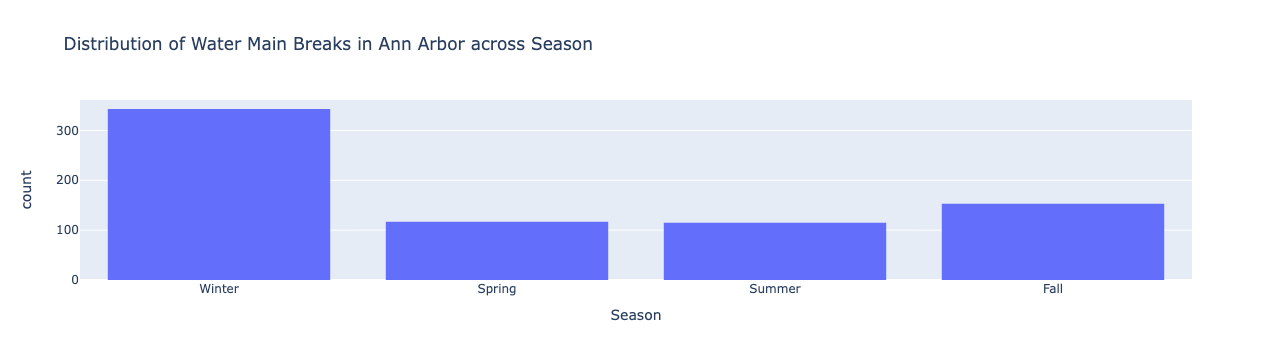

In [28]:
# Visualize the frequency of watermain breaks across season

frequency_across_seasons = px.histogram(data_by_season, x="Season",
                                       title="Distribution of Water Main Breaks in Ann Arbor across Season")
frequency_across_seasons.show()

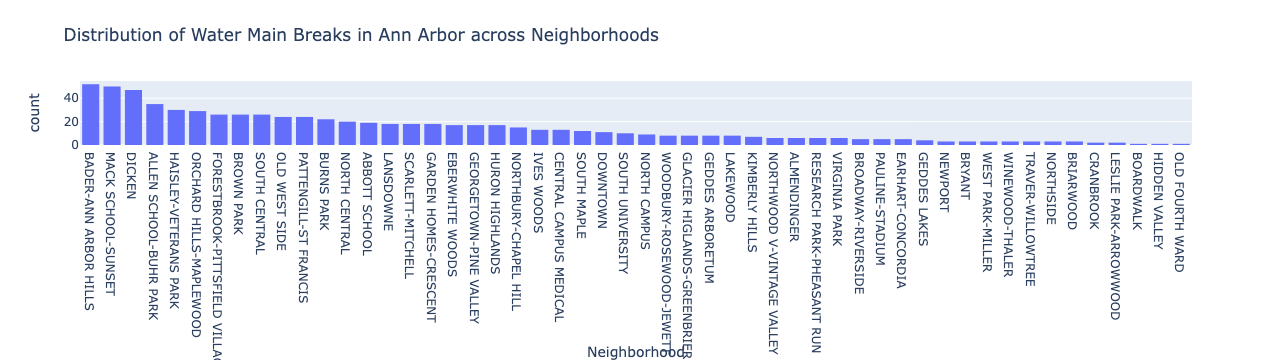

In [29]:
# Visualize the frequency of watermain breaks across neighborhood

frequency_across_neighborhood = px.histogram(data_by_season, x="Neighborhood",
                                       title="Distribution of Water Main Breaks in Ann Arbor across Neighborhoods")
frequency_across_neighborhood.update_layout(xaxis={'categoryorder':'total descending'})
frequency_across_neighborhood.show()

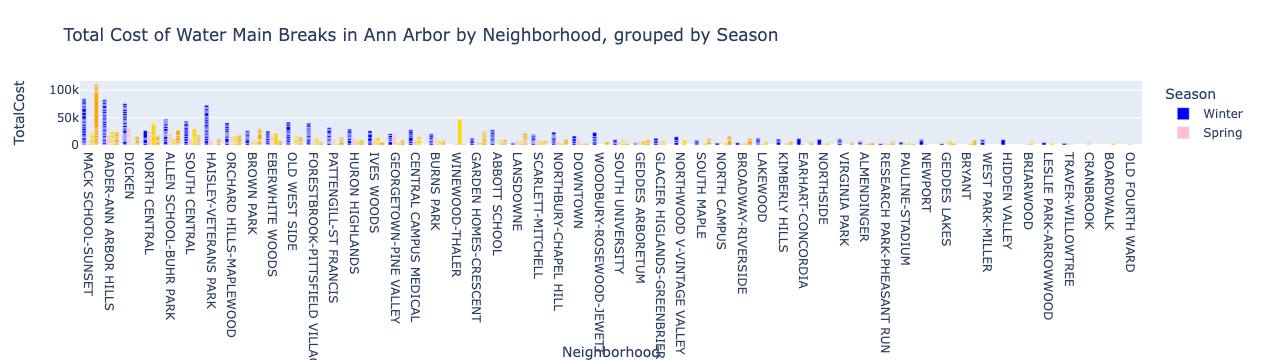

In [30]:
# Visualize the total costs of watermain breaks across several neighborhoods, grouped by season

cost_by_neighborhood_season = px.bar(data_by_season, x='Neighborhood', y='TotalCost', color="Season", barmode="group",
                                       title="Total Cost of Water Main Breaks in Ann Arbor by Neighborhood, grouped by Season",
                                       labels={"Total Cost": "Total Cost ($)"
                                              },
                                      color_discrete_map={ # replaces default color mapping by value
                                          "Winter": "Blue", "Spring": "Pink", "Summer": "Gold", "Fall": "Orange"
                                      })
cost_by_neighborhood_season.update_layout(xaxis={'categoryorder':'total descending'})
cost_by_neighborhood_season.show()

### Robustness Check

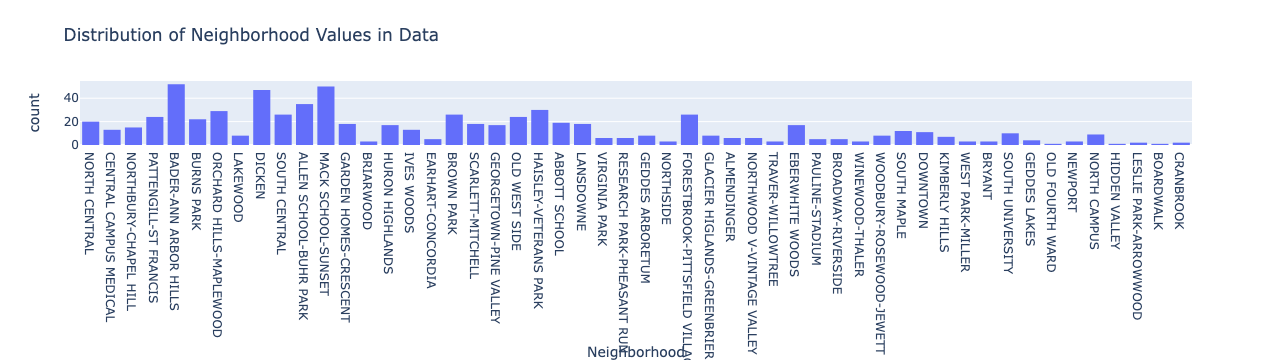

Percentage of Neighborhood Values that are Valid: 92.85714285714286%


In [35]:
# Plot distribution of the neighborhood data to see how many blank values there are
neighborhood_dist = px.histogram(data_by_season, x="Neighborhood",
                                       title="Distribution of Neighborhood Values in Data")
neighborhood_dist.show()

# Quantify what %age of the data is viable
neighborhood_value_pctg = 1-(data_by_season['Neighborhood'].value_counts()[0]/len(data_by_season['Neighborhood']))
print(f"Percentage of Neighborhood Values that are Valid: {neighborhood_value_pctg*100}%")

#If we have a majority %age of the data viable, we will find it suitable for analysis

In [37]:
# Revisit the original merged data, except now we will include the blank values
# We will check to see if the trends/conclusions match up still
blank_data_included

#this will act as another way to verify that removing blanks and replacing with 0 doesn't impact our analysis results

,Work Order ID,Priority,Status,Submit To,Actual Start,Actual Finish,Address,Location,Initiated By,Date Initiated,...,WOYCOORDINATE.1,NIEGHBORHOOD NUMBER.1,NEIGHBORHOOD.1,LANDUSE CODE.1,LANDUSE.1,LANDUSE GROUP.1,CreekName.1,ZONING CLASS.1,MINORCIVIL,SYMBOL.1
0,332757,1.0,CLOSED,NaN,12/28/2012 0:00,12/28/2012 0:00,326 E SUMMIT ST,23' W OF BEAKS WPL BEHIND WALK 8' N OF S CURB ...,user21,1/2/2013 8:49,...,5204085.152,20.0,NORTH CENTRAL,120.0,Two Family,Residential,Huron River,R4C,5.0,005R4C
1,332990,1.0,CLOSED,NaN,12/28/2012 0:00,12/28/2012 0:00,1137 E ANN ST,100' E OF GLEN AVE\n74' E OF VALVE #01-00043,user21,1/3/2013 9:34,...,5203359.117,18.0,CENTRAL CAMPUS MEDICAL,570.0,Parking,Transportation/Communication/Utilities,Huron River,R4C,5.0,005R4C
2,333296,1.0,CLOSED,user19,1/5/2013 0:00,1/5/2013 0:00,3014 LEXINGTON DR,28' N OF SPL OF 3014 LEXINGTON DR,user21,1/7/2013 10:34,...,5208237.657,1.0,NORTHBURY-CHAPEL HILL,110.0,Single Family,Residential,Traver Creek,R1C,5.0,005R1C
3,333304,1.0,CLOSED,NaN,1/6/2013 0:00,1/6/2013 0:00,1815 FERDON RD,3' FT N OF SANITARY MANHOLE AT FERDON RD AND F...,user21,1/7/2013 11:06,...,5199943.774,43.0,PATTENGILL-ST FRANCIS,110.0,Single Family,Residential,Mallets Creek,R1D,5.0,005R1D
4,333352,1.0,CLOSED,user19,1/8/2013 0:00,1/8/2013 0:00,2200 GLENDALOCH RD,52' E OF WPL,user21,1/8/2013 8:26,...,5201009.373,14.0,BADER-ANN ARBOR HILLS,110.0,Single Family,Residential,Huron River,R1A,5.0,005R1A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,865678,1.0,CLOSED,user69,NaN,8/4/2023 12:44,NaN,1117 BROOKS,user23,8/4/2023 10:00,...,5204864.100,26.0,MACK SCHOOL-SUNSET,110.0,Single Family,Residential,Allen Creek,R1C,5.0,005R1C
1154,865678,1.0,CLOSED,user69,NaN,8/4/2023 12:44,NaN,1117 BROOKS,user23,8/4/2023 10:00,...,5204864.100,26.0,MACK SCHOOL-SUNSET,110.0,Single Family,Residential,Allen Creek,R1C,5.0,005R1C
1155,865683,1.0,CLOSED,user69,8/7/2023 6:30,8/7/2023 12:30,1910 HILL ST,2023080400454 CLEARS @11:30 8-4-23,user23,8/4/2023 10:19,...,5202056.010,14.0,BADER-ANN ARBOR HILLS,140.0,Group Housing,Residential,Mallets Creek,R1C,5.0,005R1C
1156,865968,1.0,IP,user104,8/7/2023 14:30,8/7/2023 22:00,NaN,Glen Ave,user23,8/7/2023 14:04,...,5203509.441,18.0,CENTRAL CAMPUS MEDICAL,650.0,Hospital,Public/Quasi-Public/Institutional/Organi,Huron River,PL,5.0,005PL


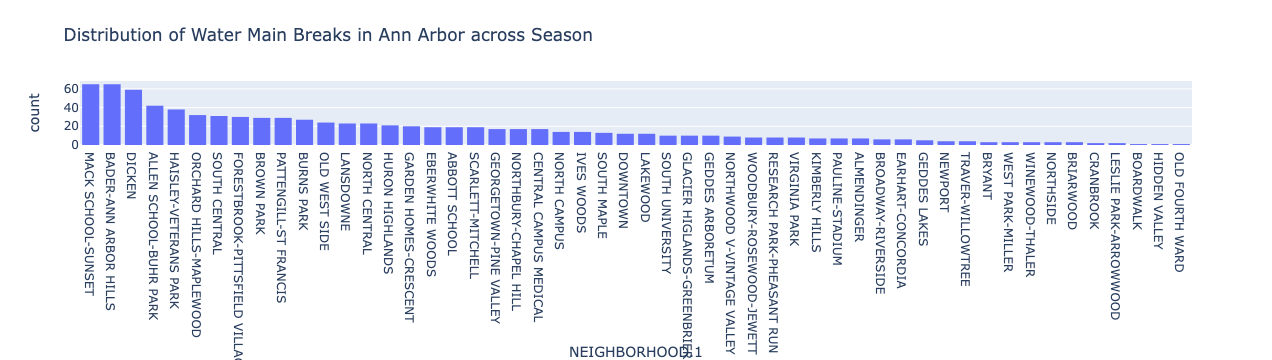

In [32]:
# Visualize the frequency of watermain breaks across neighborhood

frequency_across_seasons_blank = px.histogram(blank_data_included, x="NEIGHBORHOOD.1",
                                       title="Distribution of Water Main Breaks in Ann Arbor across Season")
frequency_across_seasons_blank.update_layout(xaxis={'categoryorder':'total descending'})
frequency_across_seasons_blank.show()

In [33]:
# Aggregate the average total cost by WOI and Season
# This will allow us to see what the average total cost is across all seasons, based on data from all WOIs and years.
# We will match this up with another aggregation method to show that our conclusions are justified

avg_cost_by_woi = data_by_season.groupby(["Work Order ID", "Season"]).aggregate( #group the total cost by month
    avg_total_cost = ("TotalCost", pd.DataFrame.mean)
    
)
avg_cost_by_season_woi = avg_cost_by_woi.groupby(["Season"]).aggregate( #group the cost by month
    avg_total_cost = ("avg_total_cost", pd.DataFrame.mean)
    
)
avg_cost_by_season_woi

,avg_total_cost
Season,
Fall,3345.411835
Spring,2941.728956
Summer,3826.783399
Winter,3076.440780


In [34]:
# Aggregate the average total cost by WOI and Month
# This will allow us to see what the average total cost is across all months, based on data from all WOIs and years.
# We will match this up with the aggregation by season to justify our conclusion

new_avg_cost_by_woi = data_by_season.groupby(["Work Order ID", "Month"]).aggregate( #group the total cost by month
    avg_total_cost = ("TotalCost", pd.DataFrame.mean)
    
)
avg_cost_by_month_woi = new_avg_cost_by_woi.groupby(["Month"]).aggregate( #group the total cost by month
    avg_total_cost = ("avg_total_cost", pd.DataFrame.mean)
    
)
avg_cost_by_month_woi

,avg_total_cost
Month,
1,2902.843577
2,3354.644610
3,3210.387922
4,2774.765956
5,2609.753878
6,4100.327919
7,3581.381219
8,3912.223999
9,3202.263078
